In [141]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import corner
import zeus

import sys
sys.path.append('../kl_tools/')

%matplotlib inline

In [142]:
fname_sampler = '../tests/test-mcmc-run/test-mcmc-sampler.pkl'
fname_truth = '../tests/test-mcmc-run/test-mcmc-truth.pkl'

with open(fname_sampler, 'rb') as f:
    sampler = pickle.load(f)
    
with open(fname_truth, 'rb') as f:
    truth = pickle.load(f)
    
# Scale a few things
# truth[2] *= 180./np.pi # theta_int

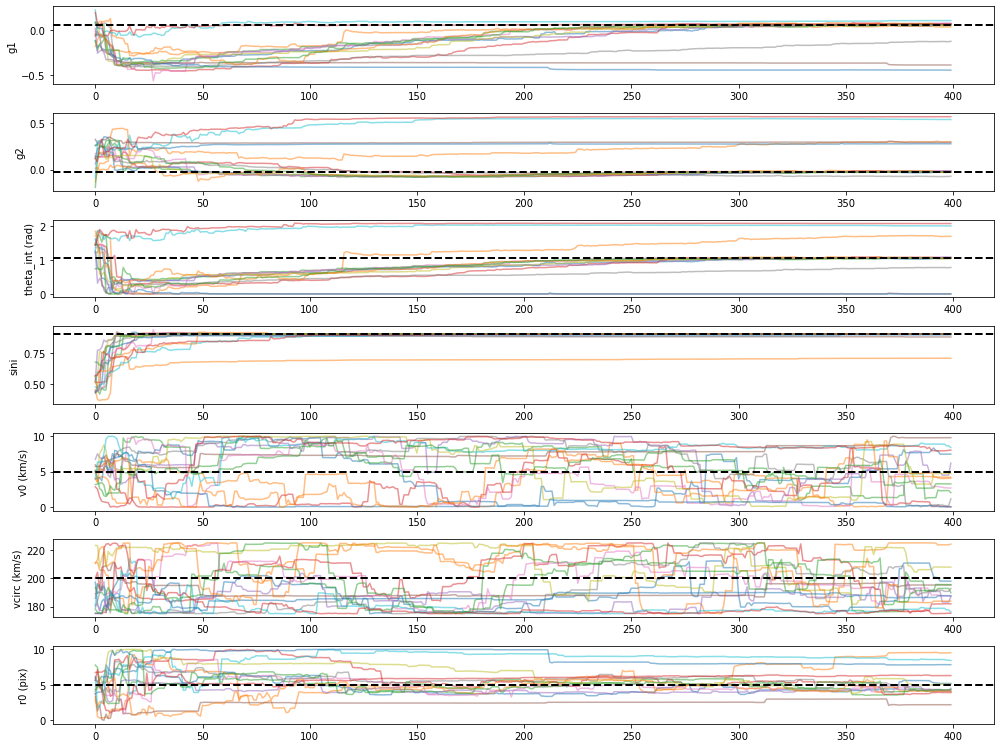

In [143]:
ndim = len(truth)
names = ['g1', 'g2', 'theta_int (rad)', 'sini', 'v0 (km/s)', 'vcirc (km/s)', 'r0 (pix)', 'rscale (pix)']
# truth = [.05, -.1, np.pi/3, 0.75, 1000, 50, 5, 5]

chain = sampler.get_chain()
burn = 0

# scale the units for some things
# chain[:,:,2] *= 180./np.pi # theta_int to degrees

plt.figure(figsize=(2*ndim,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(chain[burn:,:,n], alpha=0.5)
    plt.axhline(truth[n], lw=2, c='k', ls='--')
    plt.ylabel(names[n])
plt.tight_layout()

In [144]:
bad_walker = False

if bad_walker is True:
    c = sampler.get_chain(flat=True)

    # to remove a walker
    nwalkers = 2*ndim
    nsamples = c.shape[0] // nwalkers
    bad_indx = 1

    new_c = np.zeros((c.shape[0]-nsamples, c.shape[1]))

    k = 0
    for i in range(nwalkers):
        if i == bad_indx:
            continue
        else:
            new_c[nsamples*k:nsamples*(k+1)] = c[nsamples*i:nsamples*(i+1)]
            k += 1

    print(new_c.shape)

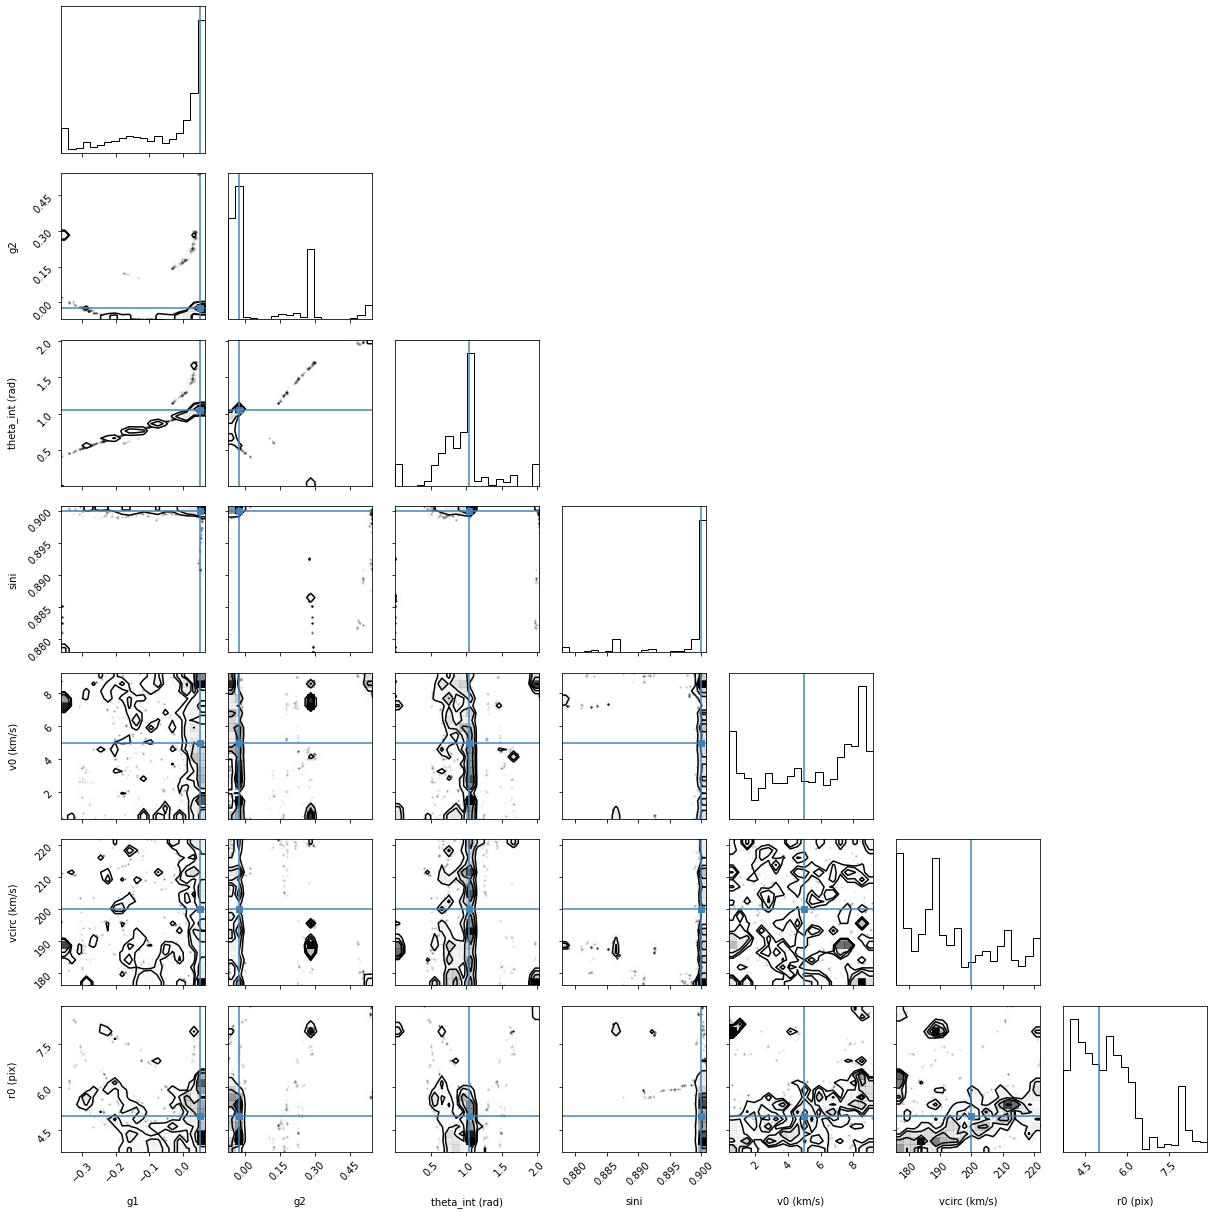

In [148]:
Nsamples = len(chain)
Nburn = 100
# crange = ndim*[(0.4, 0.6)]
crange = ndim*[0.8]
# crange = None

# pchain = chain
chain = sampler.get_chain(flat=True, discard=Nburn, thin=1)

# chain = new_c

# scale the units for some things
# chain[:,2] *= 180./np.pi # theta_int to degrees

p = corner.corner(
    chain, labels=names, truths=truth, range=crange
)

s = (17,17)
plt.gcf().set_size_inches(s)
plt.tight_layout()

outfile = './test-mcmc-corner.png'
plt.savefig(outfile)

/Users/sweveret/miniconda3/envs/kltools/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/Users/sweveret/miniconda3/envs/kltools/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/Users/sweveret/miniconda3/envs/kltools/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/Users/sweveret/miniconda3/envs/kltools/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/Users/sweveret/miniconda3/envs/kltools/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/Users/sweveret/miniconda3/env

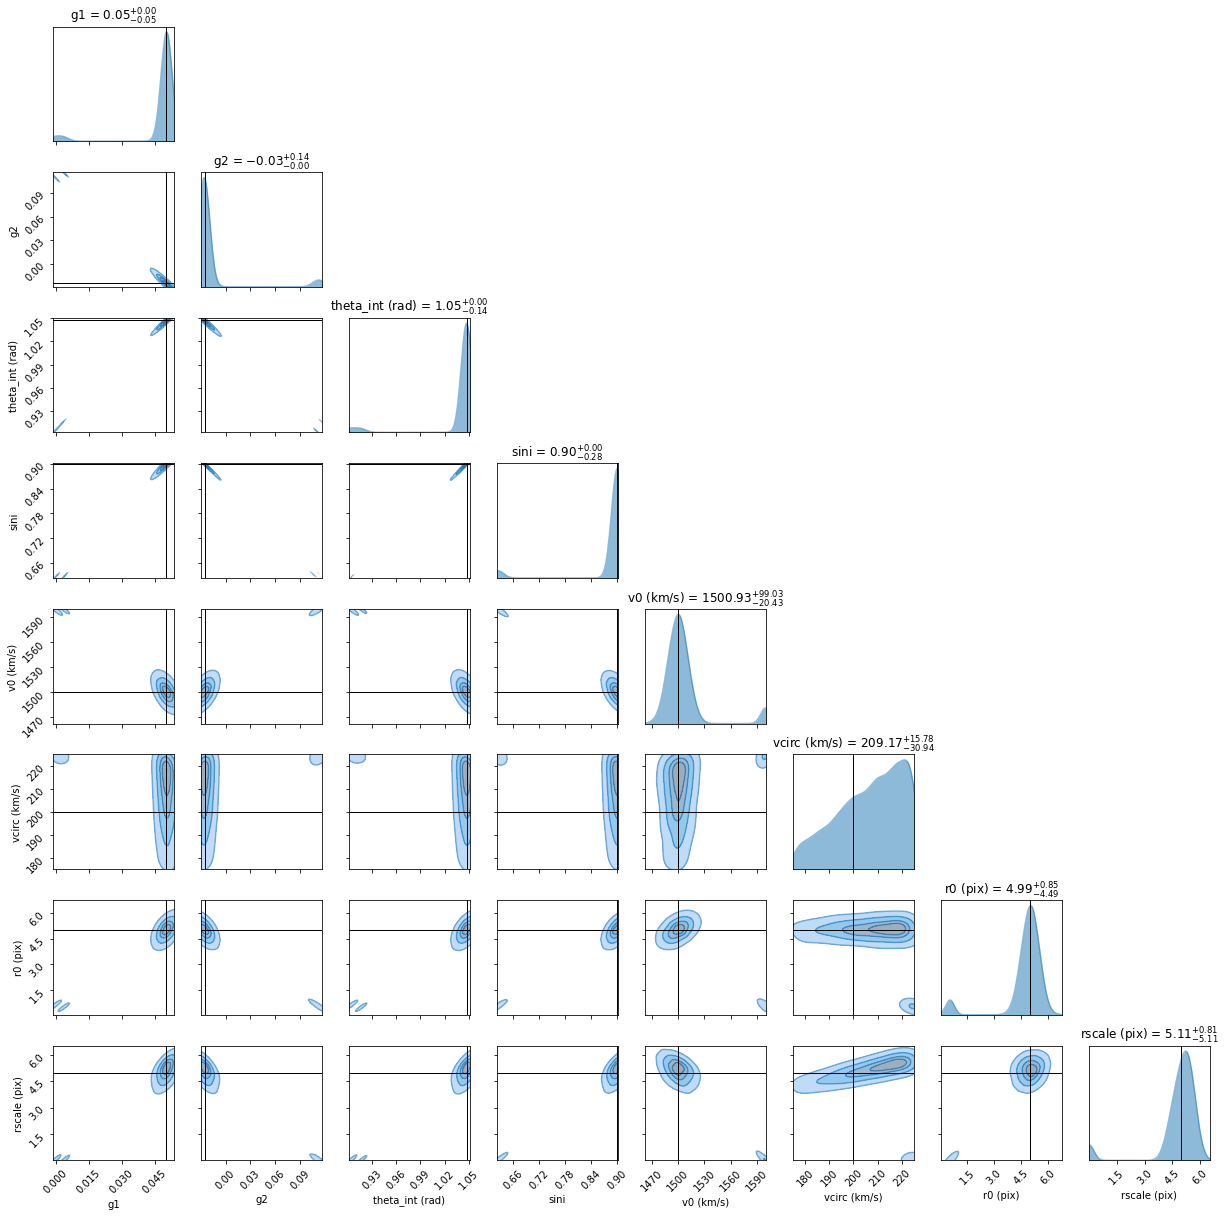

In [100]:
Nsamples = len(chain)
Nburn = 1000

# pchain = chain
chain = sampler.get_chain(flat=True, discard=Nburn, thin=20)

# scale the units for some things
# chain[:,2] *= 180./np.pi # theta_int to degrees

zeus.cornerplot(chain,
                labels=names,
                truth=truth,
               )

s = (17,17)
plt.gcf().set_size_inches(s)
plt.tight_layout()

outfile = './test-mcmc-zeus-corner.png'
plt.savefig(outfile)

In [45]:
chain.shape

(240, 8)

In [46]:
r = sampler.get_chain(flat=True)
print(r.shape)

(8000, 8)


In [19]:
r[200:,2]*180./np.pi

array([3451.82016271, 3436.09793812, 3386.23621989, ..., 3585.91828846,
       3590.9162406 , 3589.72814248])